# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [25]:
#Import all the necessary modules
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [26]:
data = pd.read_csv("pima-indians-diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [27]:
data.head(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data.tail(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [29]:
data.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
348,3,99,62,19,74,21.8,0.279,26,0
427,1,181,64,30,180,34.1,0.328,38,1
698,4,127,88,11,155,34.5,0.598,28,0
585,1,93,56,11,0,22.5,0.417,22,0
201,1,138,82,0,0,40.1,0.236,28,0
730,3,130,78,23,79,28.4,0.323,34,1
506,0,180,90,26,90,36.5,0.314,35,1
110,3,171,72,33,135,33.3,0.199,24,1
422,0,102,64,46,78,40.6,0.496,21,0
512,9,91,68,0,0,24.2,0.200,58,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [30]:
data.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [31]:
data.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [32]:
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
data.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [34]:
data.loc[ data['Plas'] == 0, 'Plas' ] = data['Plas'].median()
data.loc[ data['Pres'] == 0, 'Pres' ] = data['Pres'].median()
data.loc[ data['skin'] == 0, 'skin' ] = data['skin'].median()
data.loc[ data['test'] == 0, 'test' ] = data['test'].median()
data.loc[ data['mass'] == 0, 'mass' ] = data['mass'].median()

In [35]:
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q5 Print the descriptive statistics of each & every column using describe() function

In [36]:
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
data.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

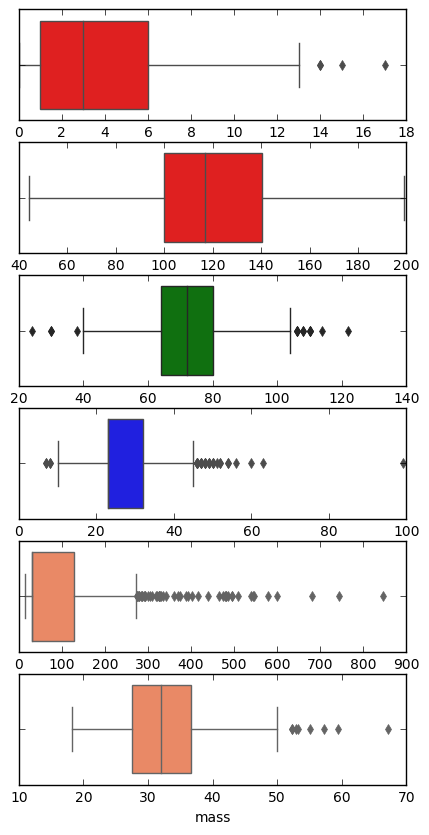

In [38]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize = (5,10))
sns.boxplot(data['Preg'], color ='r', ax = axes[0]);
sns.boxplot(data['Plas'], color ='r', ax = axes[1]);
sns.boxplot(data['Pres'], color = 'g', ax = axes[2]);
sns.boxplot(data['skin'], color = 'b', ax = axes[3]);
sns.boxplot(data['test'], color = 'coral', ax = axes[4]);
sns.boxplot(data['mass'], color = 'coral', ax = axes[5]);
plt.show()

## Insight
- There are no outlier in the plas. seems to be uniformly distributed
- There are outlier in pressure. skin and test.
- Distribution in test seem to be right skewed and it has lot of outliers

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

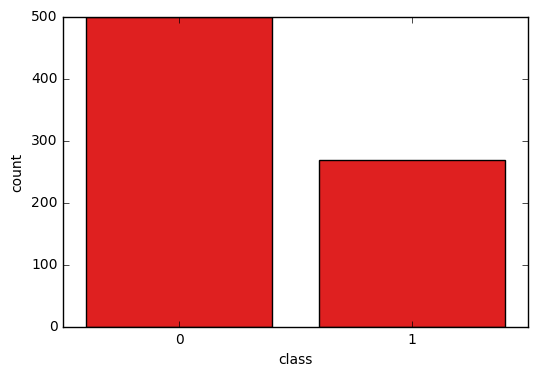

In [39]:
sns.countplot(data['class'], color ='r');

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

In [40]:
data.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
test,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
mass,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


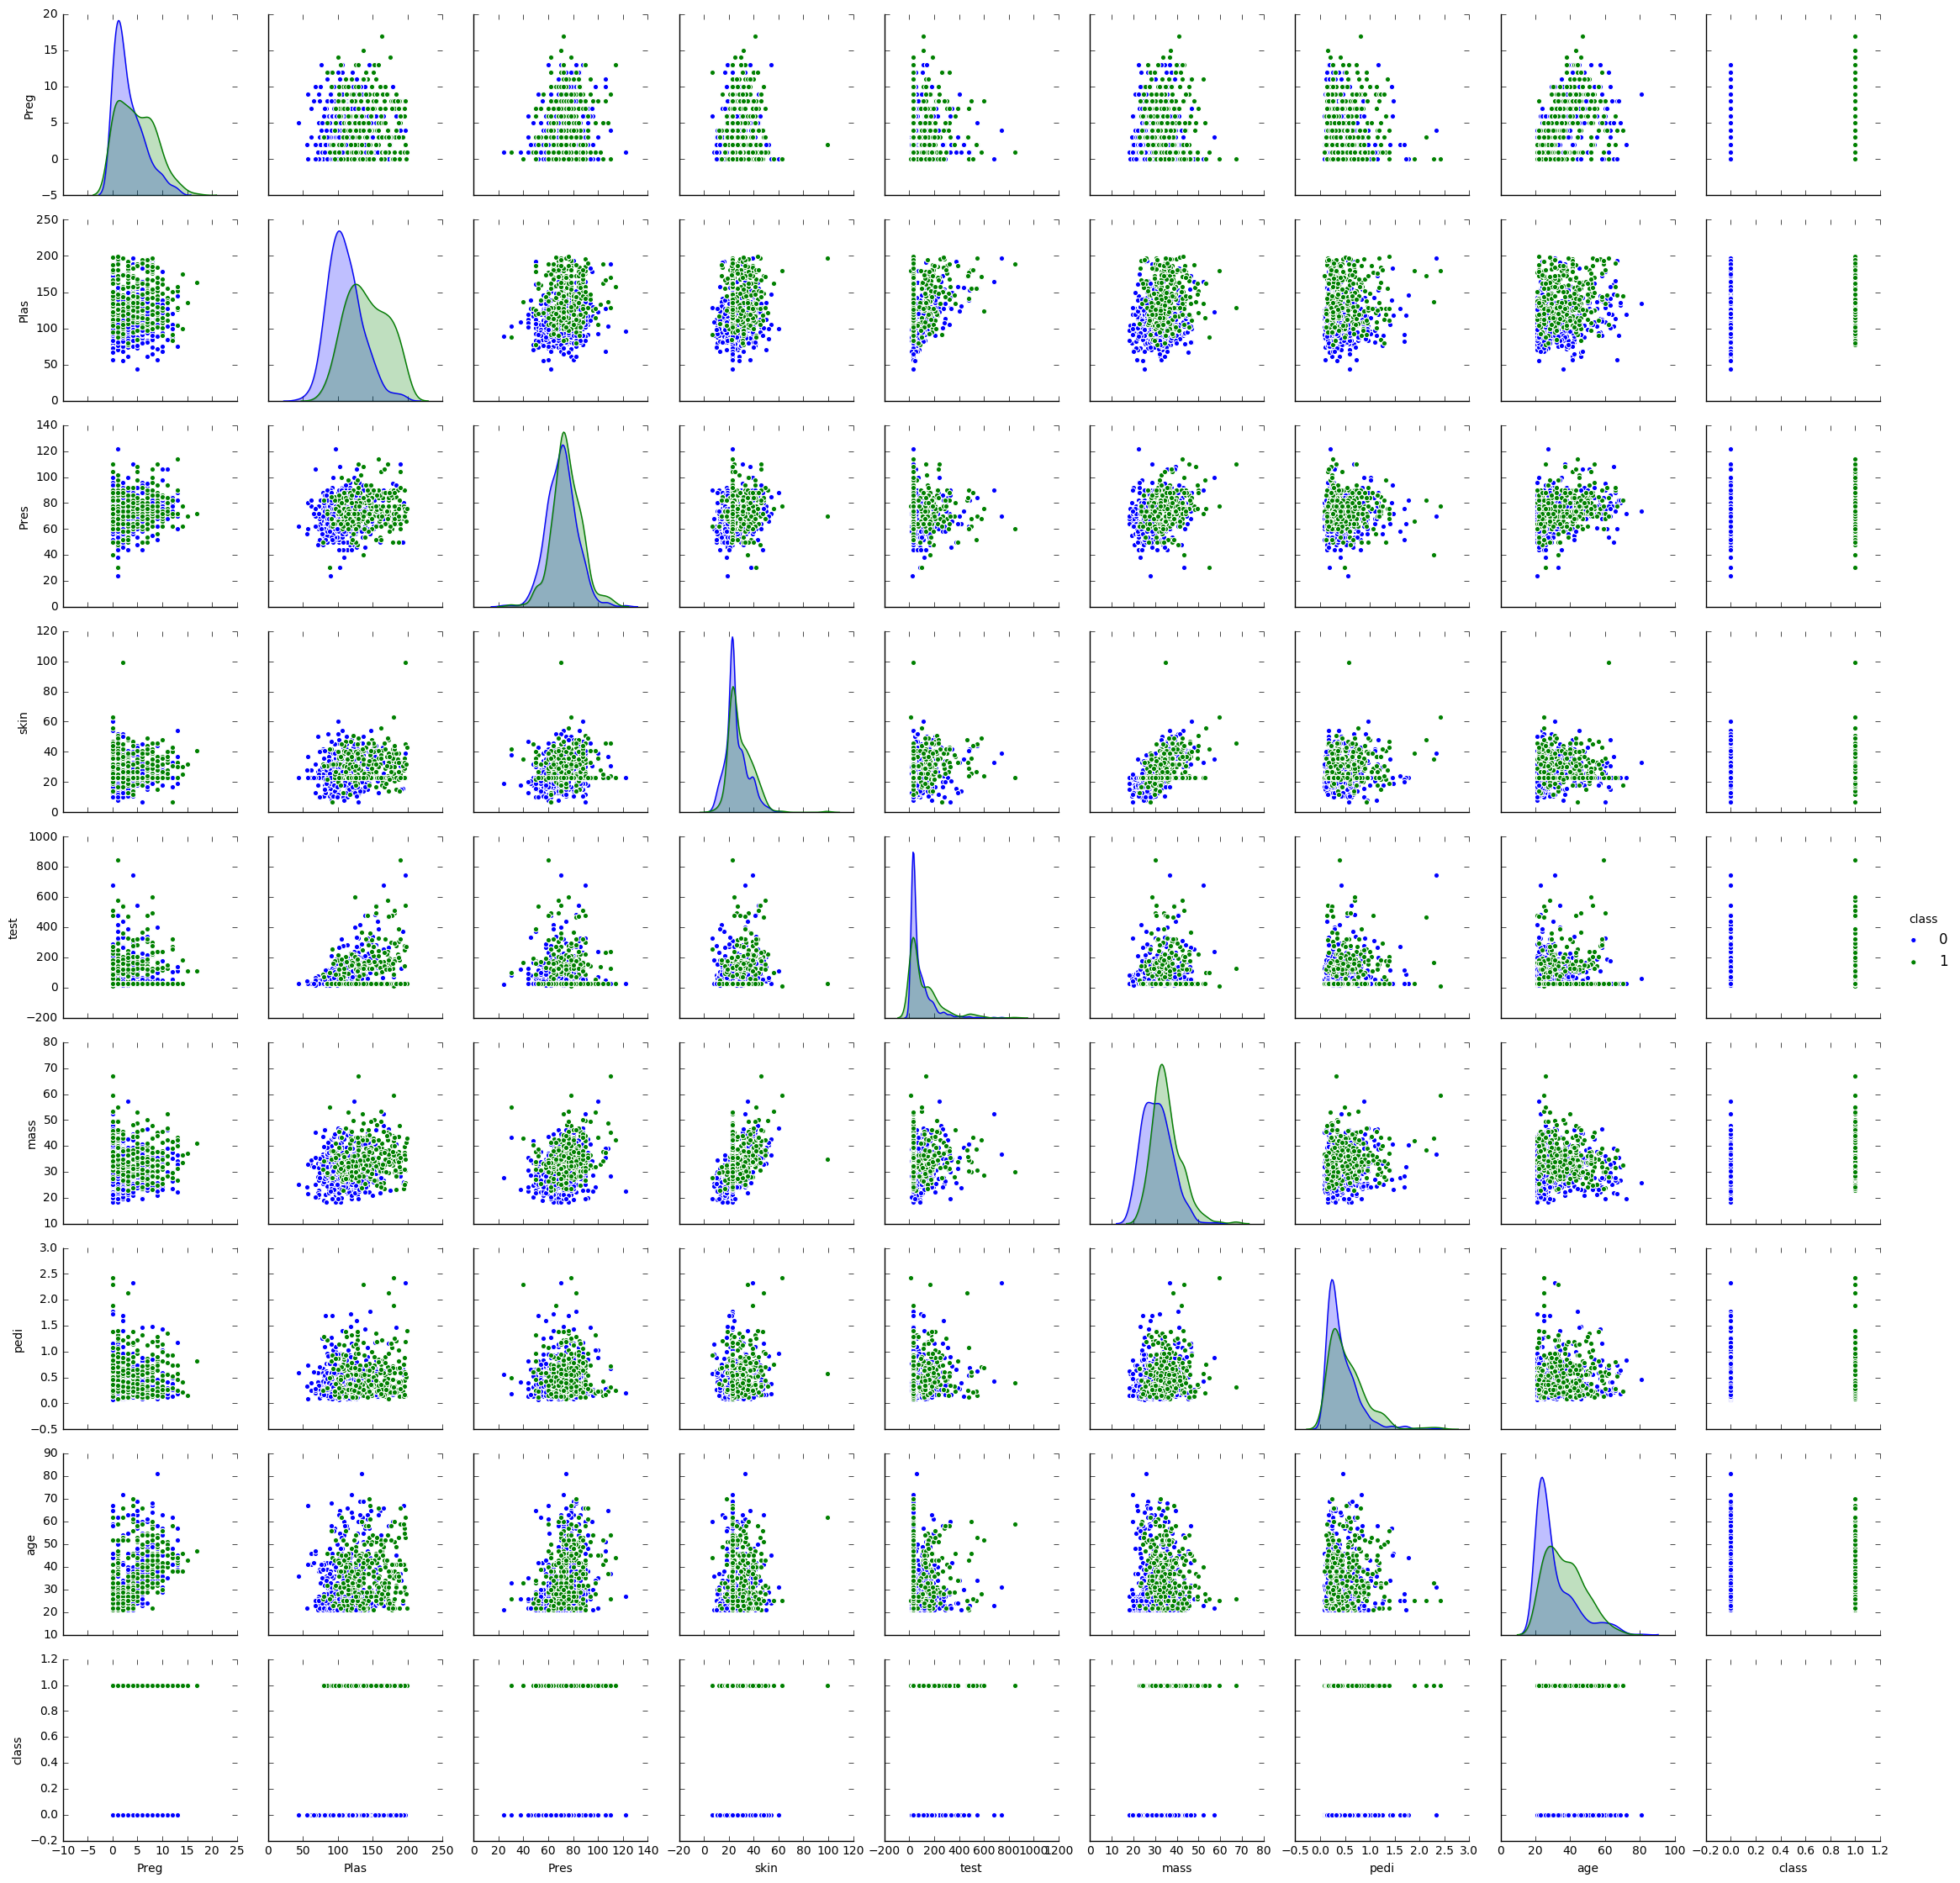

In [41]:
sns.pairplot(data, hue = 'class')
plt.show()

## Insight
- Preg has positive high correaltion with age.
- skin has positive high correaltion with mass

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [42]:
X = data.drop(["class"], axis=1)
y = data[["class"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 7)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [43]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [44]:
dt_model.score(X_test , y_test)

0.73593073593073588

In [45]:
dt_model.score(X_train , y_train)

0.77653631284916202

In [46]:
predicted=dt_model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicted)

array([[123,  24],
       [ 37,  47]])

Print the feature importance of the decision model - Optional

In [48]:
dt_model.feature_importances_

array([ 0.        ,  0.54550469,  0.        ,  0.        ,  0.        ,
        0.29828475,  0.        ,  0.15621057])